In [45]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF

In [2]:
people = fetch_lfw_people(min_faces_per_person=20, resize = 0.7)
print("people keys : {}".format(people.keys()))
print("target name : {}".format(people["target_names"]))


people keys : dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
target name : ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rud

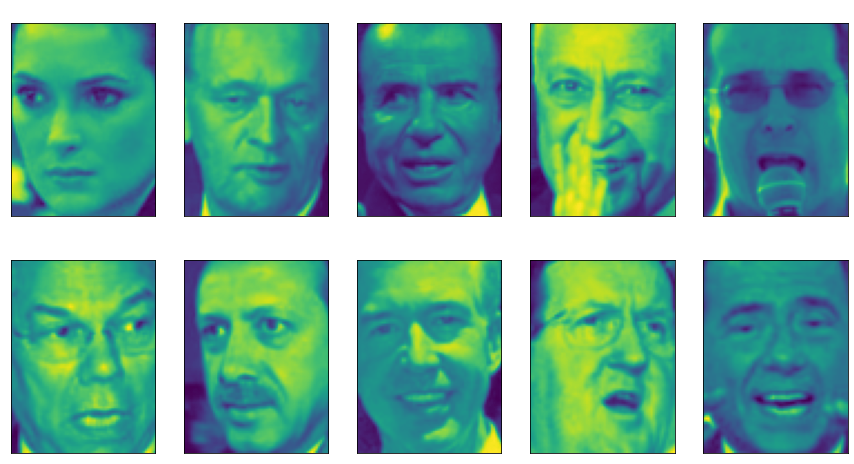

In [3]:
fix, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks' : (), 'yticks' : ()})
for target, image, ax in zip(people["target"], people["images"], axes.ravel()):
    ax.imshow(image)
    ax.set_title(people["target_names"][target], color = "white")

In [7]:
print("shape data : {}".format(people["images"].shape))
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people["target_names"])):
    print("{0:25} {1:3}".format(name, count), end = ' | ')
    if (i + 1) % 3 == 0:
        print();

shape data : (3023, 87, 65)
Alejandro Toledo           39 | Alvaro Uribe               35 | Amelie Mauresmo            21 | 
Andre Agassi               36 | Angelina Jolie             20 | Ariel Sharon               77 | 
Arnold Schwarzenegger      42 | Atal Bihari Vajpayee       24 | Bill Clinton               29 | 
Carlos Menem               21 | Colin Powell              236 | David Beckham              31 | 
Donald Rumsfeld           121 | George Robertson           22 | George W Bush             530 | 
Gerhard Schroeder         109 | Gloria Macapagal Arroyo    44 | Gray Davis                 26 | 
Guillermo Coria            30 | Hamid Karzai               22 | Hans Blix                  39 | 
Hugo Chavez                71 | Igor Ivanov                20 | Jack Straw                 28 | 
Jacques Chirac             52 | Jean Chretien              55 | Jennifer Aniston           21 | 
Jennifer Capriati          42 | Jennifer Lopez             21 | Jeremy Greenstock          24 | 
Ji

In [39]:
# pca
mask = np.zeros(people["target"].shape, dtype = "bool")
image_shape = people["images"][0].shape
for target in np.unique(people["target"]):
    mask[np.where(people["target"] == target)[0][:50]]= 1
X_people = people["data"][mask]
y_people = people["target"][mask]
X_people /= 255

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)


pca = PCA(n_components=100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape : {}".format(X_train_pca.shape))
print("pca.components_.shape: {}".format(pca.components_.shape))

X_train_pca.shape : (1547, 100)
pca.components_.shape: (100, 5655)


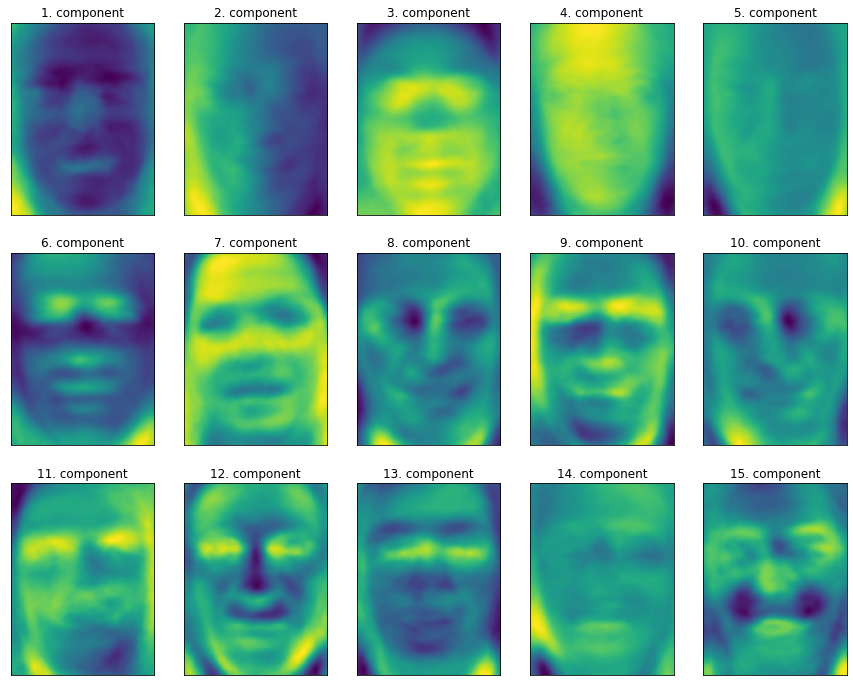

In [40]:
fix, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {'xticks' : (), 'yticks' : ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title("{}. component".format(i + 1))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.539869, ..., 0.243137],
       ...,
       [0.043137, ..., 0.593464]], dtype=float32), 
array([[0.237908, ..., 0.267974],
       ...,
       [0.401307, ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 4.6s, 0.1min


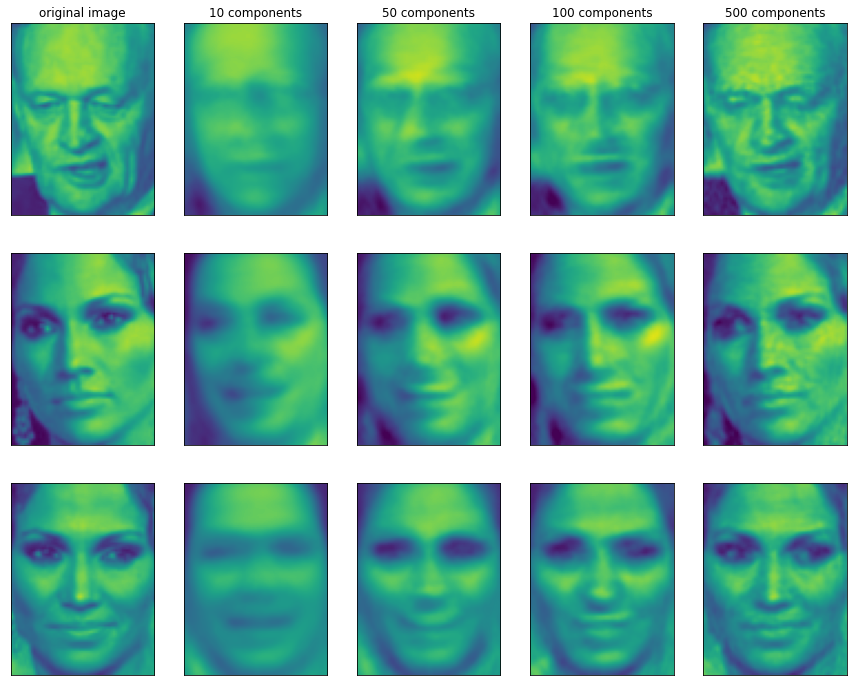

In [41]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

(1547,)


Text(0, 0.5, 'Second principal component')

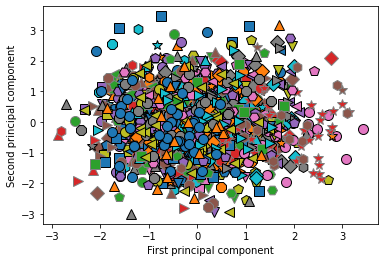

In [43]:
print(y_train.shape)
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)

plt.xlabel("First principal component")
plt.ylabel("Second principal component")

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.539869, ..., 0.243137],
       ...,
       [0.043137, ..., 0.593464]], dtype=float32), 
array([[0.237908, ..., 0.267974],
       ...,
       [0.401307, ..., 0.254902]], dtype=float32))


C:\Users\Among\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\Among\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\Among\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\Among\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increas

_____________________________________________________nmf_faces - 840.3s, 14.0min


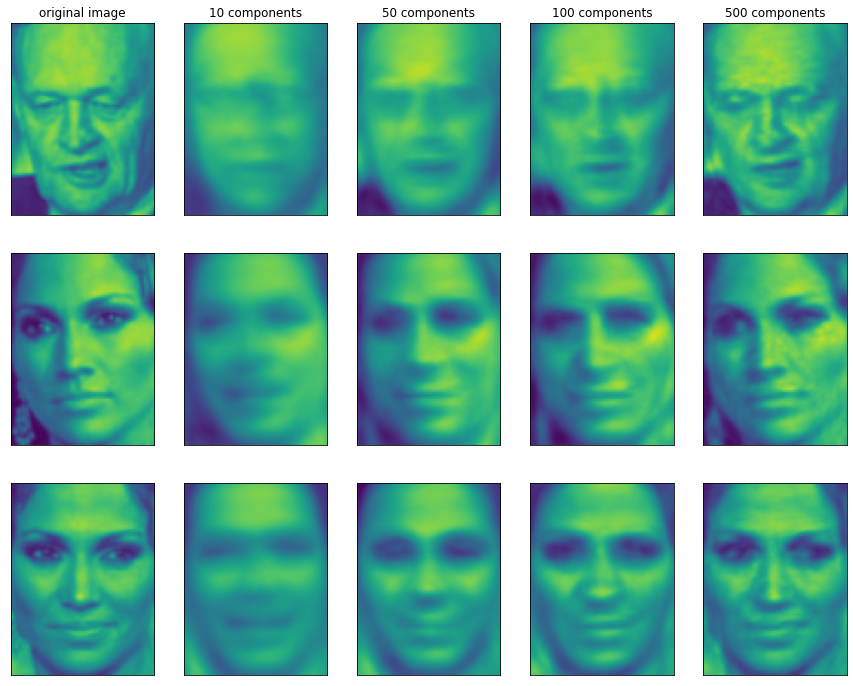

In [44]:
# NMF
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

C:\Users\Among\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\Among\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


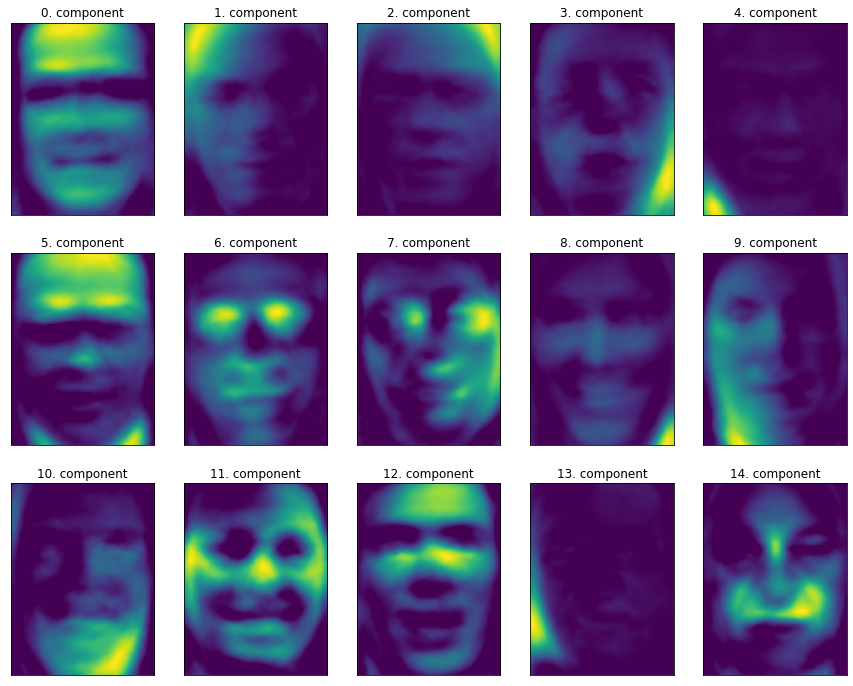

In [46]:
nmf = NMF(n_components = 15, random_state = 0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

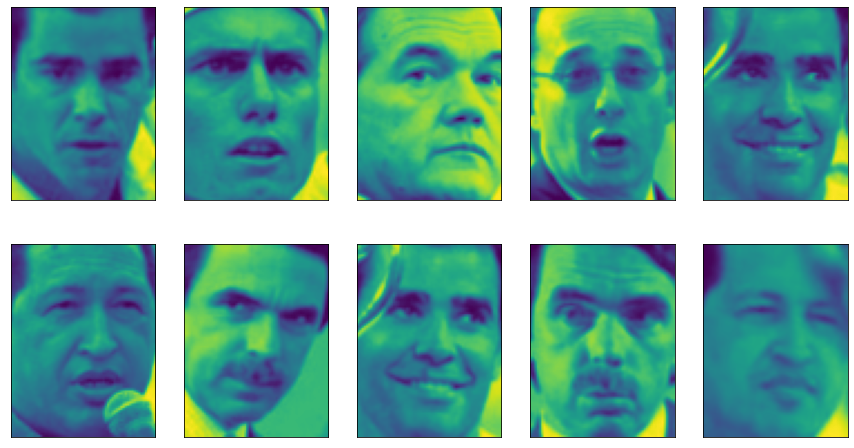

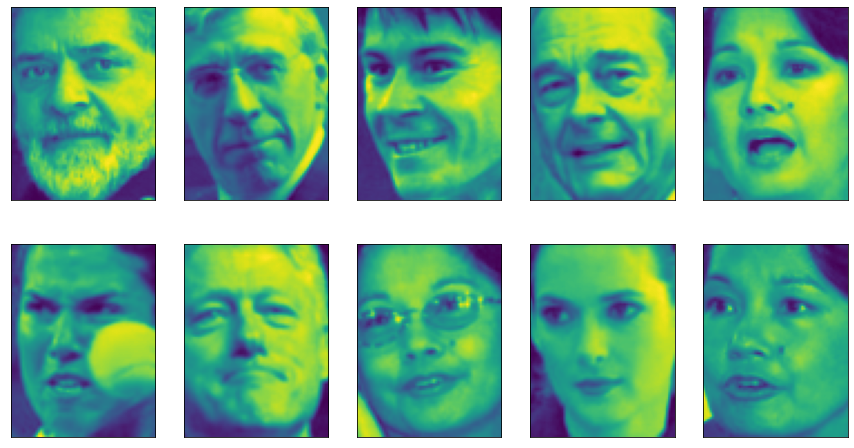

In [47]:
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks' : (), 'yticks' : ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks' : (), 'yticks' : ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

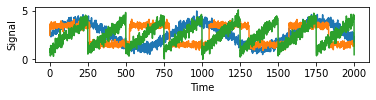

In [48]:
S = mglearn.datasets.make_signals()
plt.figure(figsize = (6, 1))
plt.plot(S, "-")
plt.xlabel("Time")
plt.ylabel("Signal")


Shape of measurements: (2000, 100)



C:\Users\Among\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\Among\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Recovered signal shape : (2000, 3)



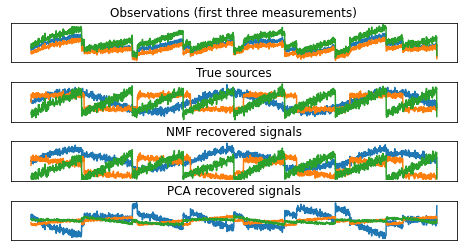

In [50]:
A = np.random.RandomState(0).uniform(size = (100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}\n".format(X.shape))

nmf = NMF(n_components = 3, random_state = 42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape : {}\n".format(S_.shape))

pca = PCA(n_components = 3)
H = pca.fit_transform(X)
models = [X, S, S_, H]
names = [
    "Observations (first three measurements)",
    "True sources",
    "NMF recovered signals",
    "PCA recovered signals"
]

fig, axes = plt.subplots(4, figsize = (8, 4), gridspec_kw = {"hspace" : .5}, subplot_kw = {"xticks" : (), "yticks": ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')